# Assignment Goal

Data preprocessing

Feature engineering

Model training & evaluation (accuracy, precision, recall, F1-score)

Hyperparameter tuning using GridSearchCV and RandomizedSearchCV

Model selection

# Import Libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load Dataset

In [11]:
data = pd.read_csv("spa.csv")

In [12]:
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [14]:
print(data.tail())

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[5 rows x 33 columns]


# Data Preprocessing

In [15]:
# Encode categorical columns
label_enc = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    data[col] = label_enc.fit_transform(data[col])

# Check and drop null values if any
print(data.isnull().sum())
data.dropna(inplace=True)


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


# Feature and Target Definition

In [16]:
# Convert G3 to binary classification: 1 if G3 >= 10, else 0
data['target'] = data['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Define features (X) and target (y)
X = data.drop(['G3', 'target'], axis=1)
y = data['target']


# Split and Scale the Data

In [17]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Multiple Models

In [18]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and Evaluate All Models

In [19]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


--- Logistic Regression ---
Accuracy: 0.9076923076923077
Precision: 0.9557522123893806
Recall: 0.9391304347826087
F1 Score: 0.9473684210526316
Confusion Matrix:
 [[ 10   5]
 [  7 108]]

--- Decision Tree ---
Accuracy: 0.9153846153846154
Precision: 0.9642857142857143
Recall: 0.9391304347826087
F1 Score: 0.9515418502202643
Confusion Matrix:
 [[ 11   4]
 [  7 108]]

--- Random Forest ---
Accuracy: 0.9230769230769231
Precision: 0.9565217391304348
Recall: 0.9565217391304348
F1 Score: 0.9565217391304348
Confusion Matrix:
 [[ 10   5]
 [  5 110]]

--- Support Vector Machine ---
Accuracy: 0.9076923076923077
Precision: 0.9256198347107438
Recall: 0.9739130434782609
F1 Score: 0.9491525423728814
Confusion Matrix:
 [[  6   9]
 [  3 112]]

--- K-Nearest Neighbors ---
Accuracy: 0.9
Precision: 0.9112903225806451
Recall: 0.9826086956521739
F1 Score: 0.9456066945606695
Confusion Matrix:
 [[  4  11]
 [  2 113]]


# Hyperparameter Tuning (Random Forest Example)

In [20]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("\nBest Parameters (GridSearchCV):", grid.best_params_)
print("Best CV Score:", grid.best_score_)



Best Parameters (GridSearchCV): {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 150}
Best CV Score: 0.9344286781179985


# Evaluate Best Model

In [21]:
best_model = grid.best_estimator_
y_best_pred = best_model.predict(X_test)

print("\n--- Final Evaluation of Best Model (Random Forest) ---")
print("Accuracy:", accuracy_score(y_test, y_best_pred))
print("Precision:", precision_score(y_test, y_best_pred))
print("Recall:", recall_score(y_test, y_best_pred))
print("F1 Score:", f1_score(y_test, y_best_pred))
print("Classification Report:\n", classification_report(y_test, y_best_pred))



--- Final Evaluation of Best Model (Random Forest) ---
Accuracy: 0.9230769230769231
Precision: 0.9411764705882353
Recall: 0.9739130434782609
F1 Score: 0.9572649572649573
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.53      0.62        15
           1       0.94      0.97      0.96       115

    accuracy                           0.92       130
   macro avg       0.83      0.75      0.79       130
weighted avg       0.92      0.92      0.92       130



# Visualize Confusion Matrix

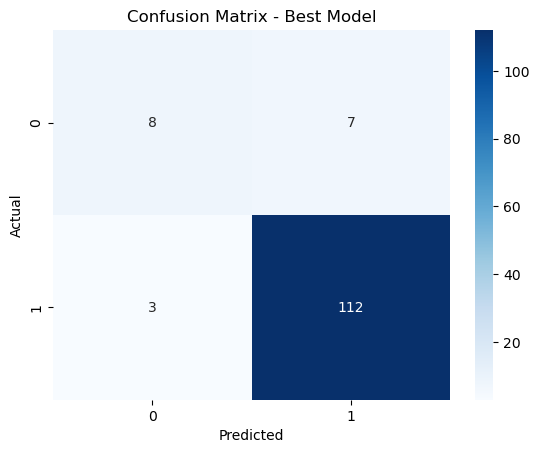

In [22]:
cm = confusion_matrix(y_test, y_best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Best Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance Visualization (Random Forest & XGBoost)

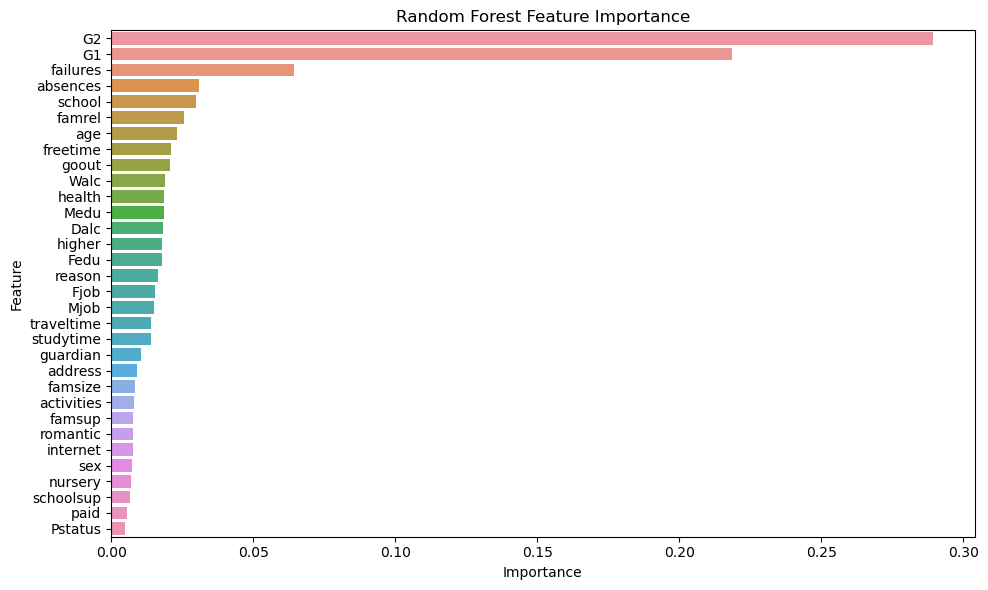

In [23]:
# Plot feature importance from the best Random Forest model
importances = best_model.feature_importances_
feature_names = X.columns

# Create DataFrame
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


# Add & Tune XGBoost Model

In [24]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Train and Tune XGBoost with RandomizedSearchCV

In [26]:
from xgboost import XGBClassifier

# Define model
xgb = XGBClassifier(eval_metric='logloss')

# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Randomized search
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist,
                                 n_iter=10, scoring='accuracy', cv=5, random_state=42)
xgb_search.fit(X_train, y_train)

# Best XGBoost model
best_xgb = xgb_search.best_estimator_

# Evaluation
y_xgb_pred = best_xgb.predict(X_test)

print("\n--- XGBoost Model Evaluation ---")
print("Best Parameters:", xgb_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_xgb_pred))
print("Precision:", precision_score(y_test, y_xgb_pred))
print("Recall:", recall_score(y_test, y_xgb_pred))
print("F1 Score:", f1_score(y_test, y_xgb_pred))
print("Classification Report:\n", classification_report(y_test, y_xgb_pred))


--- XGBoost Model Evaluation ---
Best Parameters: {'subsample': 1.0, 'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Accuracy: 0.9076923076923077
Precision: 0.9557522123893806
Recall: 0.9391304347826087
F1 Score: 0.9473684210526316
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.67      0.62        15
           1       0.96      0.94      0.95       115

    accuracy                           0.91       130
   macro avg       0.77      0.80      0.79       130
weighted avg       0.91      0.91      0.91       130



# Feature Importance - XGBoost

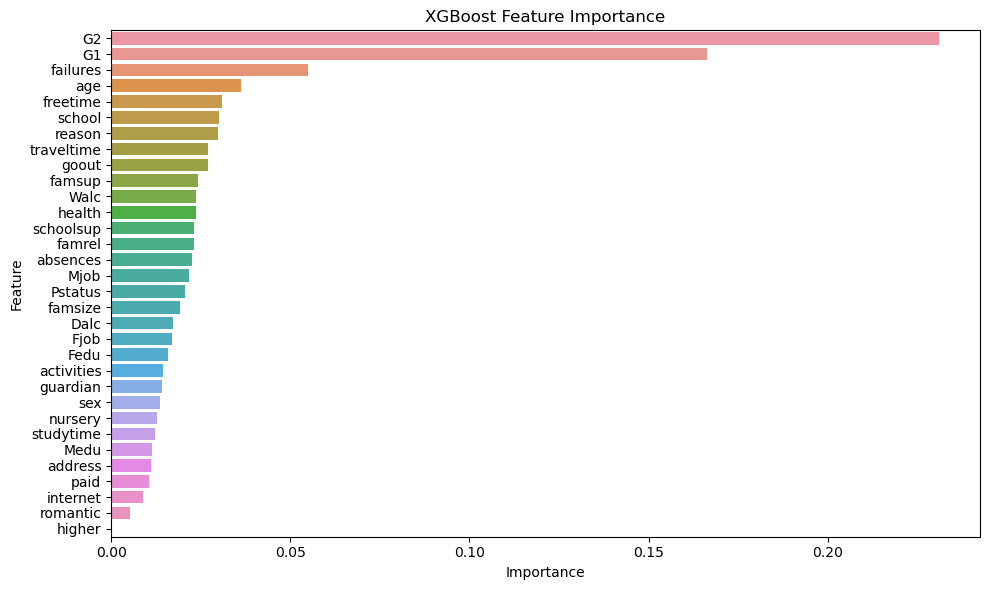

In [27]:
# XGBoost Feature Importance Plot
xgb_importance = best_xgb.feature_importances_
xgb_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_df)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()


# ✅ Final Best Model: Random Forest with tuned hyperparameters.